In [111]:
import numpy as np
import scipy.linalg as la
from numpy.random import RandomState
from scipy import signal
import cvxpy as cp

# Parameters
M = 10;
T=200;
N = 3*T;
p = 0.2;
rn = RandomState(364)

beta_true = 2*rn.rand(M)-1
beta_true = beta_true/la.norm(beta_true,1)
x_true = (rn.rand(N) < p) *rn.randn(N)

y_shifted = np.zeros(N+M);
# Shift y by M, then generate y using AR model
for t in range(N):
    y_shifted[t+M] = x_true[t]+ np.sum(np.flipud(beta_true)*y_shifted[t+M-M:t+M])
# Only observe a length T subsequence.
y= y_shifted[1+T+M:1+T+T+M]

In [143]:
import cvxpy as cp

betas = cp.Variable(M)

A = np.zeros((T-M, M))
for i in np.arange(M, T):
    A[i-M, :] = np.flip(y[i-M:i])

prob = cp.Minimize(cp.sum_squares(y[M:T] - A @ betas))
prob = cp.Problem(prob)
prob.solve()

betas_2norm = betas.value

print("status:", prob.status)
print("Predicted:", betas_2norm)
print("True:", beta_true)

status: optimal
Predicted: [-0.15467957 -0.14984028 -0.0367922   0.2224574  -0.00369537 -0.07419605
 -0.074702    0.03006813  0.03192864 -0.1204418 ]
True: [-0.02661195 -0.1427229  -0.11022044  0.12165291 -0.17682919 -0.13401851
 -0.04016229  0.05618336  0.0410527  -0.15054575]


In [144]:
import cvxpy as cp

betas = cp.Variable(M)

A = np.zeros((T-M, M))
for i in np.arange(M, T):
    A[i-M, :] = np.flip(y[i-M:i])

prob = cp.Minimize(cp.norm1(y[M:T] - A @ betas))
prob = cp.Problem(prob)
prob.solve()

betas_1norm = betas.value

print("status:", prob.status)
print("Predicted:", betas_1norm)
print("True:", beta_true)

status: optimal
Predicted: [-0.02661195 -0.1427229  -0.11022044  0.12165291 -0.17682919 -0.13401851
 -0.04016229  0.05618337  0.0410527  -0.15054575]
True: [-0.02661195 -0.1427229  -0.11022044  0.12165291 -0.17682919 -0.13401851
 -0.04016229  0.05618336  0.0410527  -0.15054575]


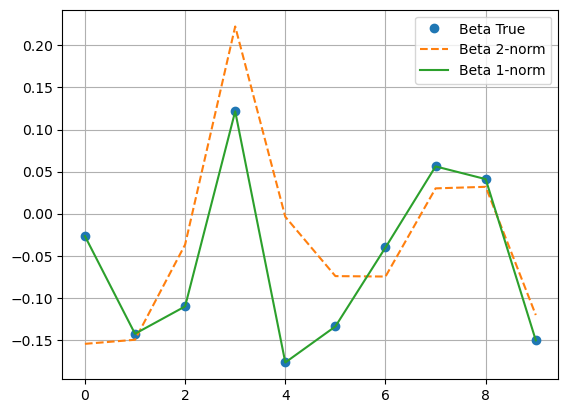

In [155]:
import matplotlib.pyplot as plt
plt.plot(beta_true, 'o', label='Beta True')
plt.plot(betas_2norm, '--', label='Beta 2-norm')
plt.plot(betas_1norm, '-', label='Beta 1-norm')
plt.grid()
plt.legend()